## 0. Data Visualization & Preprocessing

In [1]:
import timm
import fastai
import numpy as np
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
def get_data(sz):
  """
    Helper for progressive (144, 288)
  """
  transform_kwargs = {"do_flip": True,
                     "flip_vert": True,
                     "max_rotate": 180,
                     "max_zoom": 1.2,
                     "max_lighting": 0.2,
                     "max_warp": 0.2,
                     "p_affine": 0.75,
                     "p_lighting": 0.7,
                    }
  tfms = get_transforms(**transform_kwargs)
  data_bunch_kwargs = {"path": "/home/jupyter/cassava/data/train/train/",
                         "train": "/home/jupyter/cassava/data/train/train/",
                         "valid_pct": 0.2,
                         "size": sz,
                         "bs": 32,
                         "ds_tfms": tfms,
                         "test": "/home/jupyter/cassava/data/test/test/"}

  data = ImageDataBunch.from_folder(**data_bunch_kwargs).normalize()
  return data

In [3]:
data = get_data(224)

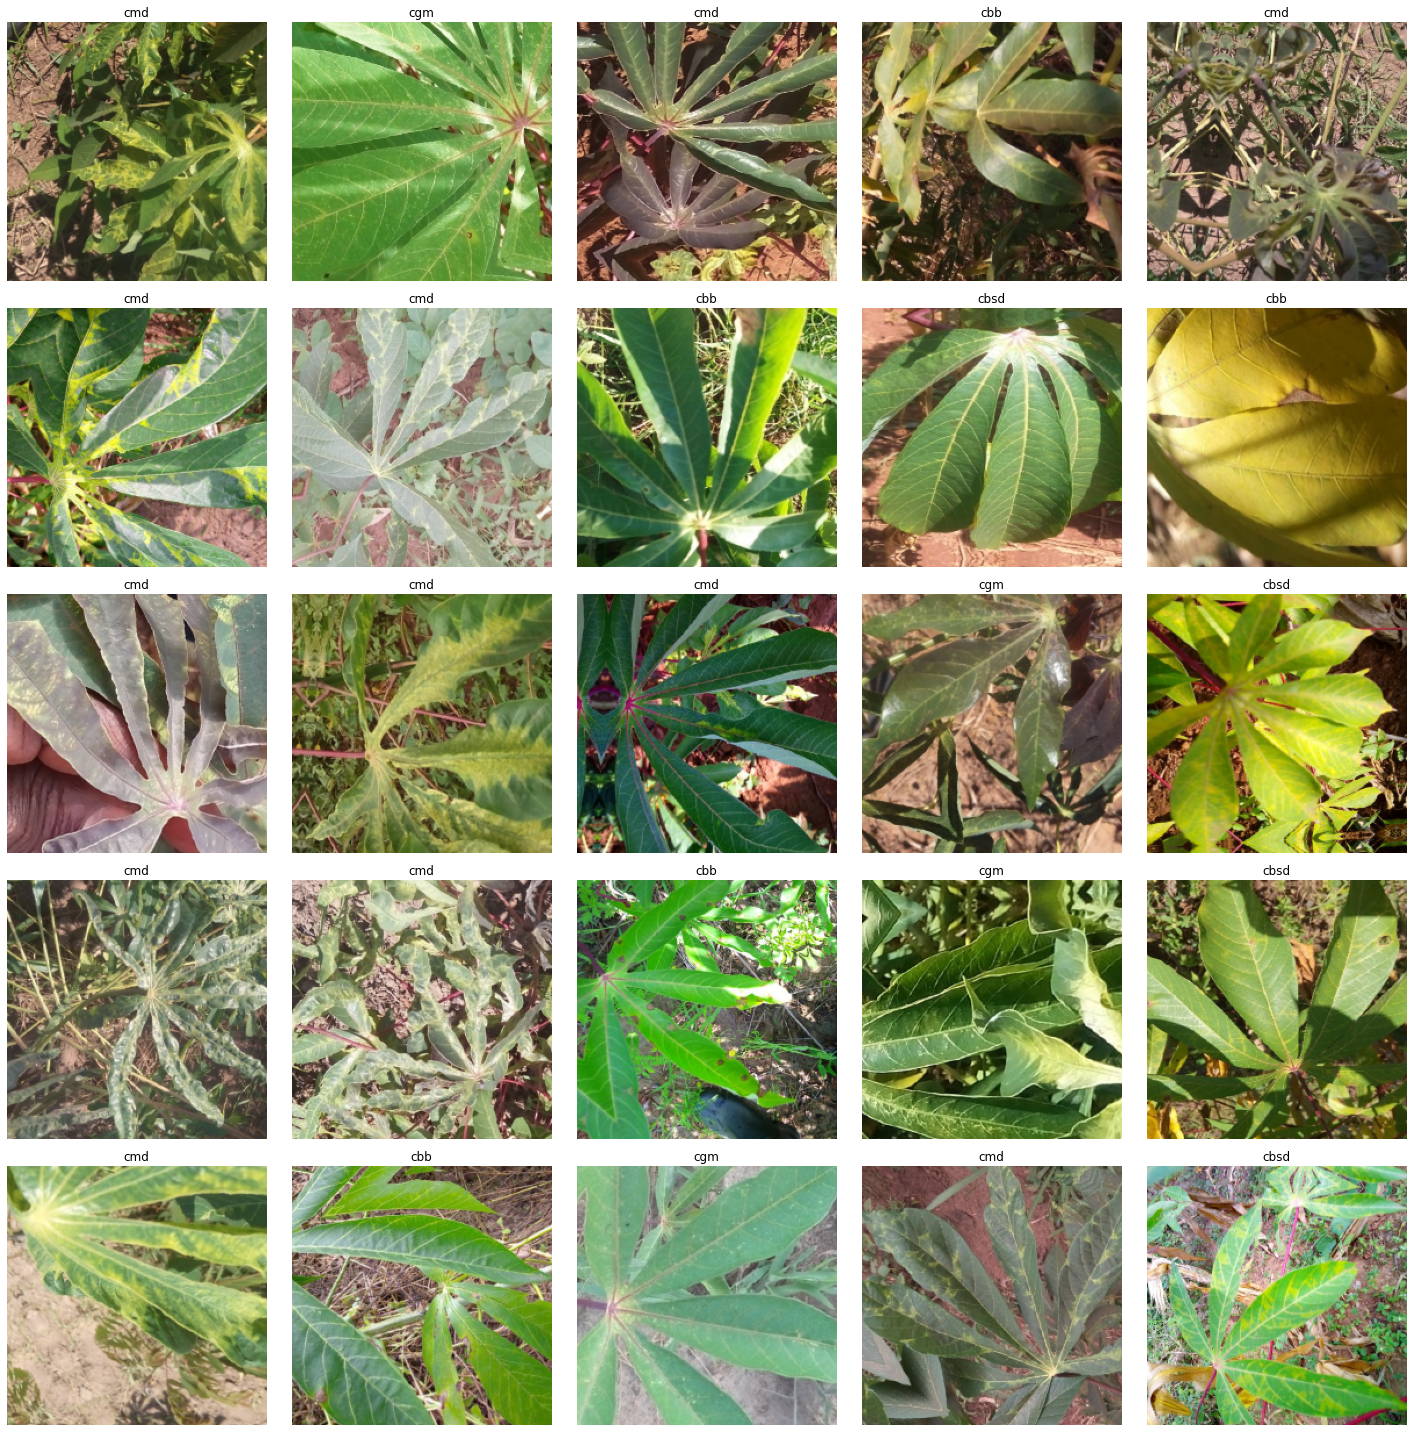

In [4]:
data.show_batch(rows=5, figsize=(20,20))

In [4]:
data.train_ds

LabelList (4525 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
healthy,healthy,healthy,healthy,healthy
Path: /home/jupyter/cassava/data/train/train

In [5]:
data.valid_ds

LabelList (1131 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cmd,cgm,healthy,healthy,cbsd
Path: /home/jupyter/cassava/data/train/train

In [6]:
data.test_ds

LabelList (3774 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/jupyter/cassava/data/train/train

## 1. Modelling

In [9]:
# Saving and loading model weight
defaults.device = torch.device('cuda')
def get_path(model_name, img_size):
  model_name = 'cassava-{}-{}.pt'.format(model_name,img_size)
  path = F"/home/jupyter/cassava/models/{model_name}"
  return path

### 1.1 Resnet101

In [5]:
backbone = lambda arg: timm.create_model('resnet101', pretrained=True, num_classes=5)

In [9]:
# 224
resnet101_learner = cnn_learner(get_data(224), base_arch=backbone, pretrained=False, metrics=[accuracy])
resnet101_learner.fit_one_cycle(8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


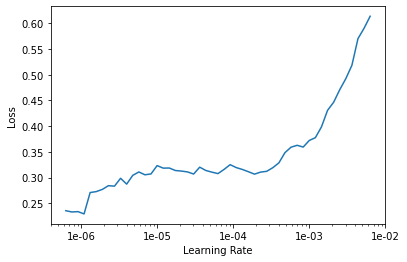

In [10]:
resnet101_learner.unfreeze()
resnet101_learner.lr_find()
resnet101_learner.recorder.plot()

In [11]:
resnet101_learner.fit_one_cycle(8, 1e-6)

In [12]:
resnet101_learner.save(get_path('resnet101', 224))

In [13]:
# 350
resnet101_learner = cnn_learner(get_data(350), base_arch=backbone, metrics=[accuracy]).mixup().load(get_path('resnet101', 224))
resnet101_learner.fit_one_cycle(8)

In [14]:
resnet101_learner.save(get_path('resnet101', 350))

### 1.2 Resnext 101

In [6]:
# ig_resnext101_32x8d, 'resnext101_32x8d'
backbone = lambda arg: timm.create_model('ig_resnext101_32x8d', pretrained=True, num_classes=5)

In [9]:
resnext101_learner = cnn_learner(get_data(224), base_arch=backbone, pretrained=False, metrics=[accuracy])
resnext101_learner.fit_one_cycle(8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


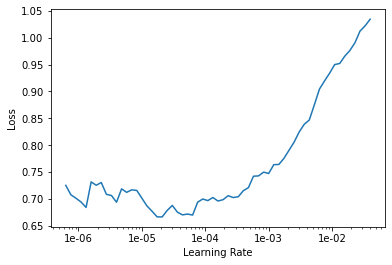

In [10]:
resnext101_learner.unfreeze()
resnext101_learner.lr_find()
resnext101_learner.recorder.plot()

In [11]:
resnext101_learner.fit_one_cycle(8, max_lr=slice(1e-05, 1e-04))

In [12]:
resnext101_learner.save(get_path('resnext101', 224))

In [7]:
# 300
resnext101_learner = cnn_learner(get_data(300), base_arch=backbone, metrics=[accuracy]).mixup().load(get_path('resnext101', 224))
resnext101_learner.fit_one_cycle(8)

In [8]:
resnext101_learner.save(get_path('resnext101', 300))

### 1.3 EfficientNet B3

In [4]:
# tf_efficientnet_b3_ns *tfp, tf_efficientnet_b3_ns
backbone = lambda arg: timm.create_model('tf_efficientnet_b3_ns', pretrained=True, num_classes=5)

In [5]:
efficientnet_b3_learner = cnn_learner(get_data(224), base_arch=backbone, pretrained=False, metrics=[accuracy])
efficientnet_b3_learner.fit_one_cycle(8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


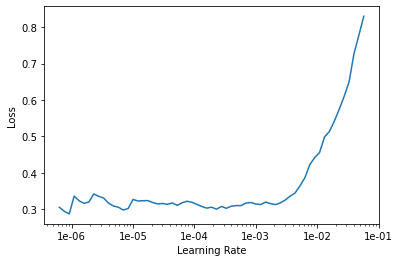

In [6]:
efficientnet_b3_learner.unfreeze()
efficientnet_b3_learner.lr_find()
efficientnet_b3_learner.recorder.plot()

In [7]:
efficientnet_b3_learner.fit_one_cycle(8, max_lr=slice(1e-04, 1e-03))

In [10]:
efficientnet_b3_learner.save(get_path('efficientnet_b3', 224))

In [11]:
# 350
efficientnet_b3_learner = cnn_learner(get_data(350), base_arch=backbone, metrics=[accuracy]).load(get_path('efficientnet_b3', 224))
efficientnet_b3_learner.fit_one_cycle(8)

In [12]:
efficientnet_b3_learner.save(get_path('efficientnet_b3', 350))

### 1.4 EfficientNet B4

In [5]:
# tf_efficientnet_b4_ns *tfp, tf_efficientnet_b4_ns
backbone = lambda arg: timm.create_model('tf_efficientnet_b4_ns', pretrained=True, num_classes=5)

In [6]:
efficientnet_b4_learner = cnn_learner(get_data(224), base_arch=backbone, pretrained=False, metrics=[accuracy])
efficientnet_b4_learner.fit_one_cycle(8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


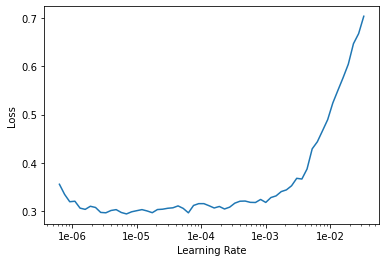

In [7]:
efficientnet_b4_learner.unfreeze()
efficientnet_b4_learner.lr_find()
efficientnet_b4_learner.recorder.plot()

In [8]:
efficientnet_b4_learner.fit_one_cycle(8, max_lr=slice(1e-05, 1e-04))

In [9]:
efficientnet_b4_learner.save(get_path('efficientnet_b4', 224))

In [6]:
# 320
efficientnet_b4_learner = cnn_learner(get_data(320), base_arch=backbone, metrics=[accuracy]).mixup().load(get_path('efficientnet_b4', 224))
efficientnet_b4_learner.fit_one_cycle(8)

In [7]:
efficientnet_b4_learner.save(get_path('efficientnet_b4', 320))

## 2. Evaluation

### 2.1 Resnet101

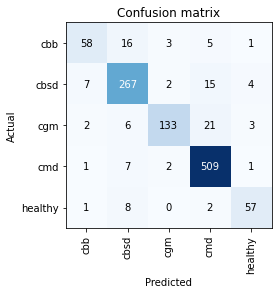

In [15]:
interp = ClassificationInterpretation.from_learner(resnet101_learner)
interp.plot_confusion_matrix()

### 2.2 ResNext101

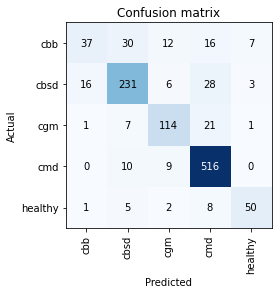

In [9]:
interp = ClassificationInterpretation.from_learner(resnext101_learner)
interp.plot_confusion_matrix()

### 2.3 EfficientNet B3

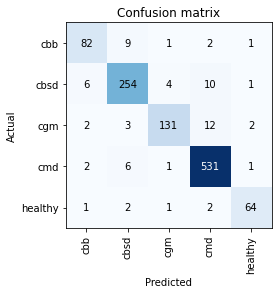

In [13]:
interp = ClassificationInterpretation.from_learner(efficientnet_b3_learner)
interp.plot_confusion_matrix()

### 2.4 EfficientNet B4

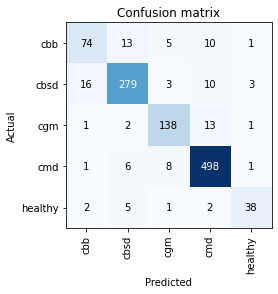

In [8]:
interp = ClassificationInterpretation.from_learner(efficientnet_b4_learner)
interp.plot_confusion_matrix()

## 3. Generating Submission File

### 3.1 Prediction Resnet101

In [16]:
predicted_probabilities, _ = resnet101_learner.TTA(ds_type=fastai.basic_data.DatasetType.Test)

In [27]:
a = predicted_probabilities.cpu().numpy()

In [28]:
np.savetxt('resnet101preds.txt', predicted_probabilities)
b = np.loadtxt('resnet101preds.txt', dtype=float)

In [30]:
np.all(a == b)

True

### 3.2 Prediction ResNext101

In [10]:
predicted_probabilities, _ = resnext101_learner.TTA(ds_type=fastai.basic_data.DatasetType.Test)

In [11]:
a = predicted_probabilities.cpu().numpy()

In [12]:
np.savetxt('resnext101preds.txt', predicted_probabilities)
b = np.loadtxt('resnext101preds.txt', dtype=float)

In [13]:
np.all(a == b)

True

### 3.3 Prediction Efficient B3

In [14]:
predicted_probabilities, _ = efficientnet_b3_learner.TTA(ds_type=fastai.basic_data.DatasetType.Test)

In [12]:
a = predicted_probabilities.cpu().numpy()

In [14]:
np.savetxt('efficientnet_b3_learner_preds.txt', predicted_probabilities)
b = np.loadtxt('efficientnet_b3_learner_preds.txt', dtype=float)

In [15]:
np.all(a == b)

True

### 3.4 Prediction Effiencient B4

In [9]:
predicted_probabilities, _ = efficientnet_b3_learner.TTA(ds_type=fastai.basic_data.DatasetType.Test)

In [10]:
a = predicted_probabilities.cpu().numpy()

In [11]:
np.savetxt('efficientnet_b4_learner_preds.txt', predicted_probabilities)
b = np.loadtxt('efficientnet_b4_learner_preds.txt', dtype=float)

In [12]:
np.all(a == b)

True

## 4. Average prediction and generate submission for the ensemble

In [14]:
eff_b3 = np.loadtxt('efficientnet_b3_learner_preds.txt', dtype=float)
# eff_b4 = np.loadtxt('efficientnet_b4_learner_preds.txt', dtype=float)

In [5]:
ens_preds = [eff_b3, eff_b4]

In [6]:
predicted_probabilities = np.mean(ens_preds, axis=0)

In [15]:
predicted_probabilities = torch.from_numpy(eff_b3)

In [15]:
_, predicted_classes = predicted_probabilities.max(dim=1)
class_labels = np.array(['cbb','cbsd','cgm','cmd','healthy'])
predicted_class_labels = class_labels[predicted_classes]

filenames = np.array([item.name for item in data.test_ds.items])

submission = (pd.DataFrame
                .from_dict({'Category': predicted_class_labels,'Id': filenames}))

In [16]:
submission.to_csv('submission-effb3.csv', header=True, index=False)